In [243]:
# importing notebook dependencies 
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 150

# main libraries
import os
import pandas as pd
import numpy as np

# importing vega datasets
from vega_datasets import data

# visualization libraries/modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid", font_scale = 0.75)

from datetime import datetime
import requests

from tqdm.notebook import tqdm, trange
import time # to be used in loop iterations

# for learning & filling-in missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

----
### **``Time Series Module: Data Preparation Exercises``**
    date: Thursday, August 11th 2022

**Exercise Number 1: Using your store items data. Convert date column to datetime format.**

In [244]:
# importing the merged sales dataframe

df = pd.read_csv("merged_sales.csv")
df.head()

,item,sale_amount,sale_date,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [245]:
# cheking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   store          913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ MB


In [246]:
 # let's convert the sale date to proper DateTime

 df["sale_date"] = pd.to_datetime(df["sale_date"], infer_datetime_format=True)
 df.info() # checks out!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item           913000 non-null  int64         
 1   sale_amount    913000 non-null  float64       
 2   sale_date      913000 non-null  datetime64[ns]
 3   store          913000 non-null  int64         
 4   item_brand     913000 non-null  object        
 5   item_name      913000 non-null  object        
 6   item_price     913000 non-null  float64       
 7   item_upc12     913000 non-null  int64         
 8   item_upc14     913000 non-null  int64         
 9   store_address  913000 non-null  object        
 10  store_city     913000 non-null  object        
 11  store_state    913000 non-null  object        
 12  store_zipcode  913000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 90.6+ MB


----
#### **``Exercise Number 2: Plot the distribution of sale_amount and item_price``**

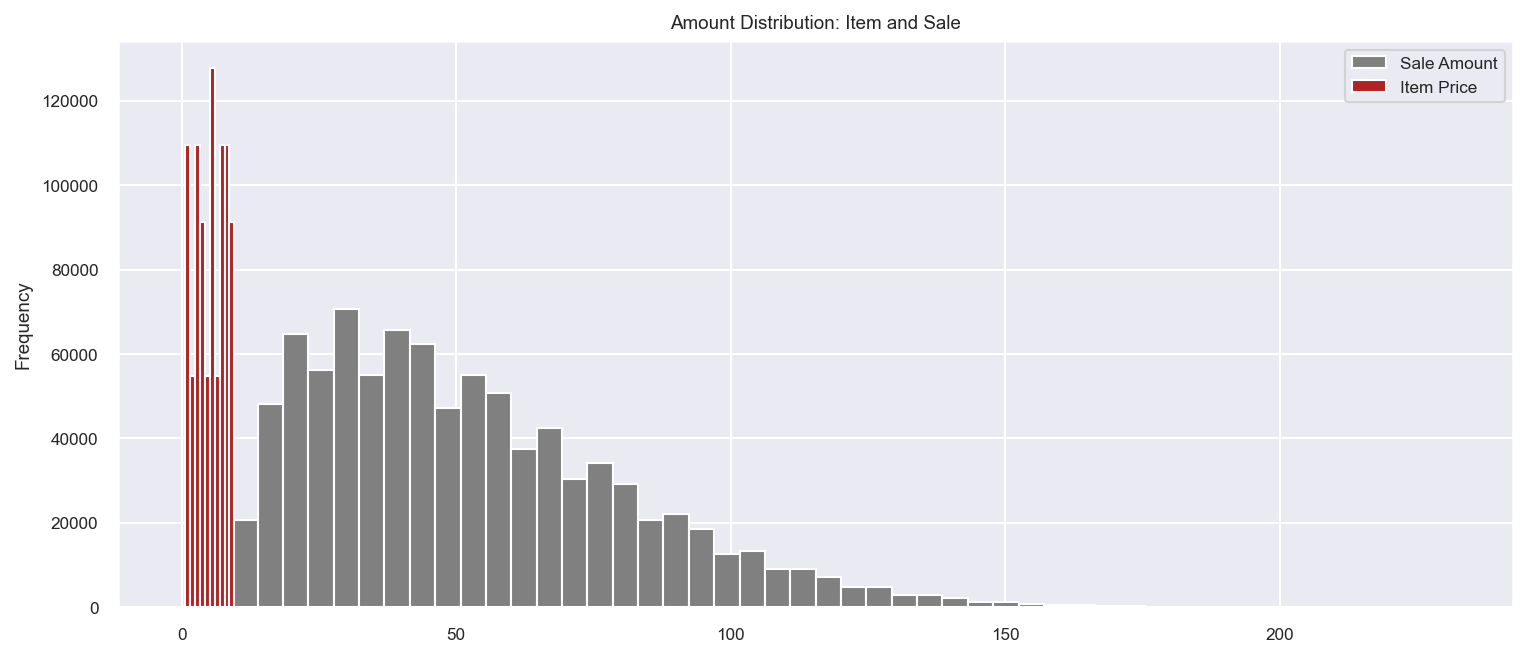

In [247]:
# let's plot two lines over time

plt.figure(figsize = (12, 5))

df["sale_amount"].plot(kind = "hist", label = "Sale Amount", color = "gray", bins = 50)
df["item_price"].plot(kind = "hist", label = "Item Price", color = "firebrick")

plt.title("Amount Distribution: Item and Sale")
plt.xticks(rotation = 0)
plt.legend()
plt.show()

# graph reads a bit 'muddled'

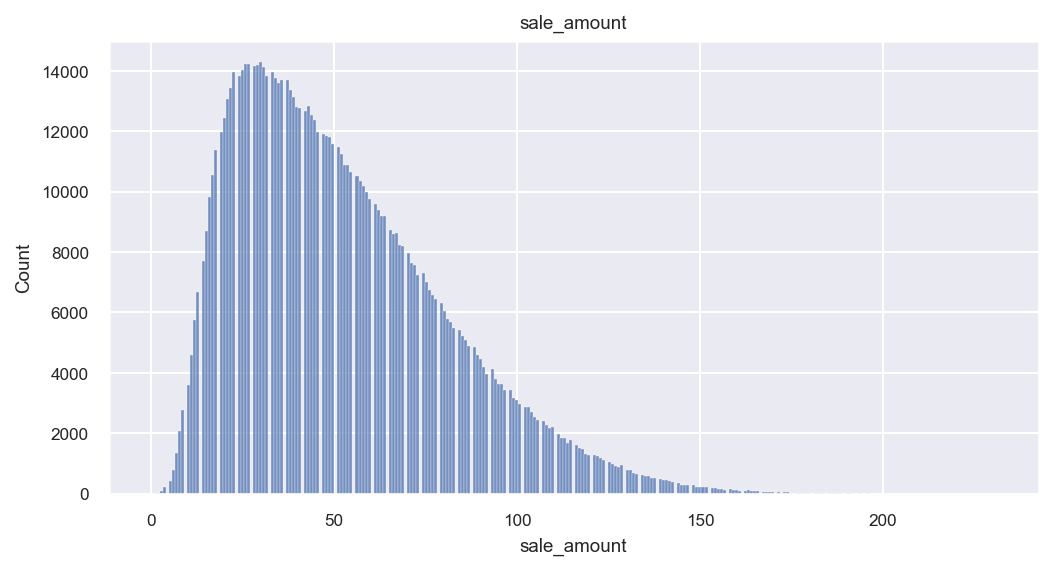

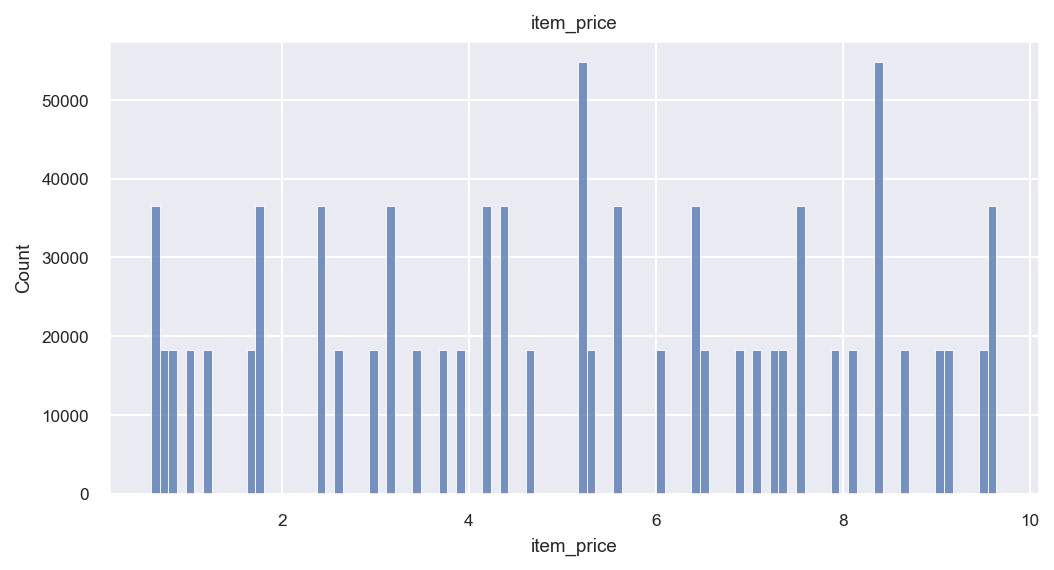

In [248]:
# individual plots

for col in df.columns:
    if col == "sale_amount" or col == "item_price":
        plt.figure(figsize = (8, 4))

        sns.histplot(df[col])

        plt.title(col)
        plt.show()

----
#### **``Exercise Number 3: Set the index to be the datetime variable``**

In [249]:
# let's set sale date to index 

df = df.set_index("sale_date")
df.head() # checks out!

,item,sale_amount,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,
2013-01-01,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-02,1,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-03,1,14.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-04,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-05,1,10.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


----
#### **``Exercise Number 4: Add a 'month' and 'day of week' column to your dataframe``**

In [250]:
# let's add a month column first

df["month"] = df.index.strftime("%B")
df.head()

,item,sale_amount,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January
2013-01-02,1,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January
2013-01-03,1,14.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January
2013-01-04,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January
2013-01-05,1,10.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January


In [251]:
# let's isolate the month

df["day_of_week"] = df.index.strftime("%A")
df.head()

,item,sale_amount,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday
2013-01-02,1,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Wednesday
2013-01-03,1,14.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Thursday
2013-01-04,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Friday
2013-01-05,1,10.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Saturday


----
#### **``Exercise Number 5: Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price``**

In [252]:
# total sales is equal to sale amount - item price (this figure being the final price amount?)
# or said another way, sale total = original price of item * sale 

df["sales_total"] = df["sale_amount"] * df["item_price"]
df.head()

,item,sale_amount,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-02,1,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Wednesday,9.24
2013-01-03,1,14.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Thursday,11.76
2013-01-04,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Friday,10.92
2013-01-05,1,10.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Saturday,8.40


----
#### **``Exercise Number 6: Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results``**

In [253]:
# getting the merged sales df

def get_sales_df():
    filename = "merged_sales.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)

In [254]:
# cleaning the dataframe for proper datetime and indexing

def clean_sales_df(df):

     # convert the sale date to proper DateTime
     df["sale_date"] = pd.to_datetime(df["sale_date"], infer_datetime_format=True)

     # setting date to index
     df = df.set_index("sale_date")

    # isolating and creating a month and day of the week column 
     df["month_and_day"] = df.index.strftime("%B %d")
    
     # creating a "sales total" column 
     df["sales_total"] = df["sale_amount"] - df["item_price"]

     # return the cleaned* df
     return df

In [255]:
# let's try the new functions

df = get_sales_df()
print()
print(f'shape: {df.shape}')
df.head()


shape: (913000, 13)


,item,sale_amount,sale_date,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [256]:
# clean sales df

df = clean_sales_df(df)
print(f'shape: {df.shape}')
df.head()

shape: (913000, 14)


,item,sale_amount,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month_and_day,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January 01,12.16
2013-01-02,1,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January 02,10.16
2013-01-03,1,14.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January 03,13.16
2013-01-04,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January 04,12.16
2013-01-05,1,10.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January 05,9.16


In [257]:
# quick info

df.info() # checks out!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   store          913000 non-null  int64  
 3   item_brand     913000 non-null  object 
 4   item_name      913000 non-null  object 
 5   item_price     913000 non-null  float64
 6   item_upc12     913000 non-null  int64  
 7   item_upc14     913000 non-null  int64  
 8   store_address  913000 non-null  object 
 9   store_city     913000 non-null  object 
 10  store_state    913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  month_and_day  913000 non-null  object 
 13  sales_total    913000 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 104.5+ MB


----
### ``Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:``

1. Convert date column to datetime format.
2. Plot the distribution of each of your variables.
3. Set the index to be the datetime variable.
4. Add a month and a year column to your dataframe.
5. Fill any missing values.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [258]:
# creating a function for the german enery df

def get_energy_df():
    filename = "german_energy.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename, index_col=[0])

In [259]:
# importing the data and checking the head

df = get_energy_df()
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [260]:
# quick info check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 205.5+ KB


In [261]:
# Convert date column to datetime format

df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 205.5 KB


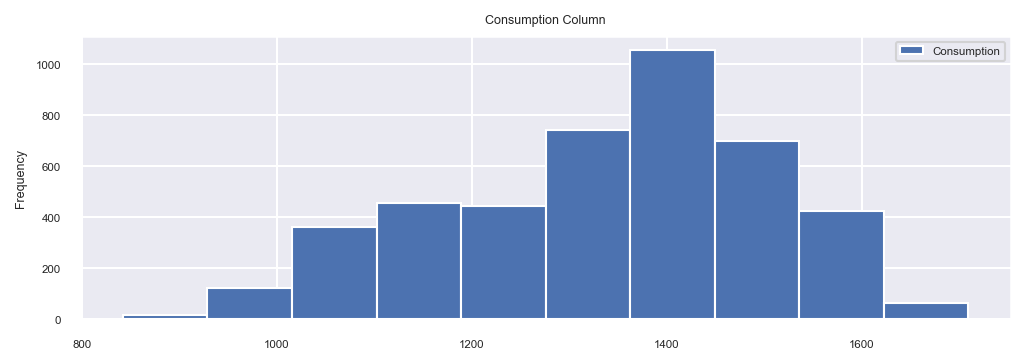

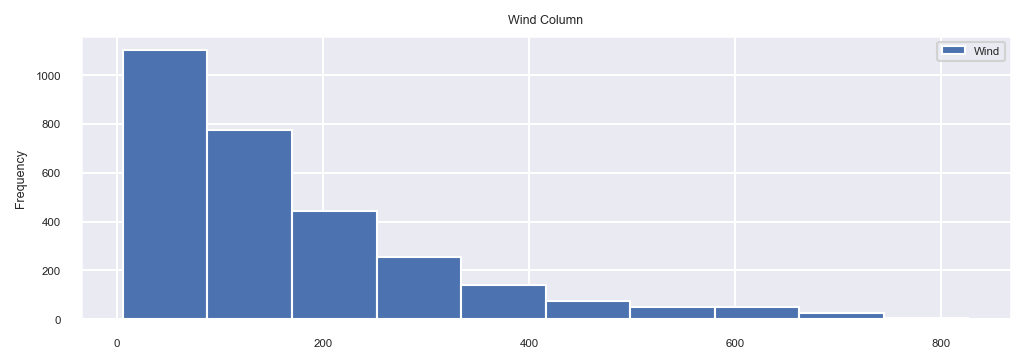

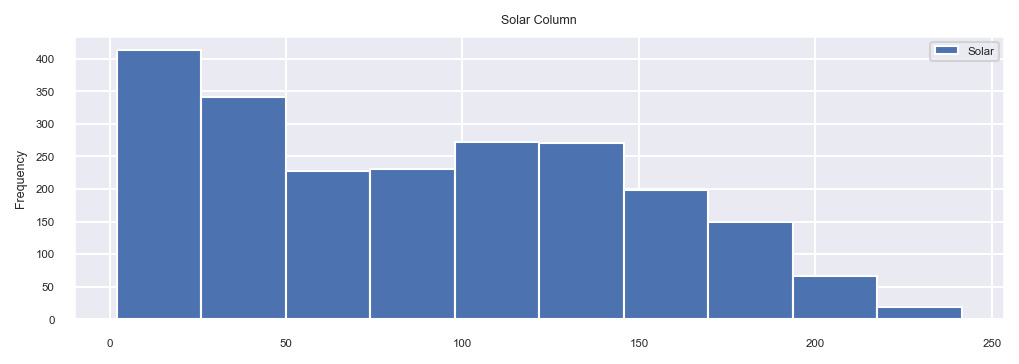

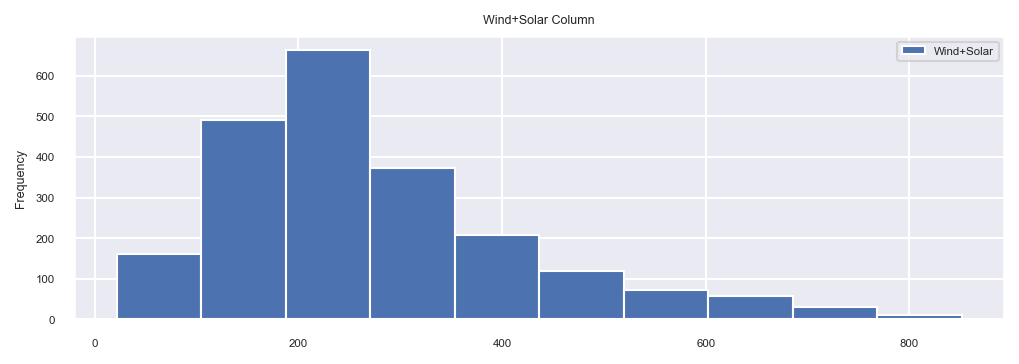

In [262]:
# Plot the distribution of each of your variables

for col in df.columns:
    if col != "Date":
        plt.figure(figsize=(8, 2.5))
        sns.set(font_scale = 0.5)
        df[col].plot(kind = "hist")

        plt.legend()
        plt.title(f'{col} Column')
        plt.show()

In [263]:
# Set the index to be the datetime variable

df = df.set_index("Date")
df.head() # checks out!

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [264]:
# adding a year column to the df

df["year"] = df.index.strftime("%Y")
df.head()

,Consumption,Wind,Solar,Wind+Solar,year
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006
2006-01-02,1380.521,NaN,NaN,NaN,2006
2006-01-03,1442.533,NaN,NaN,NaN,2006
2006-01-04,1457.217,NaN,NaN,NaN,2006
2006-01-05,1477.131,NaN,NaN,NaN,2006


In [265]:
# adding a month column

df["month"] = df.index.strftime("%B")
df.head()

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,January
2006-01-02,1380.521,NaN,NaN,NaN,2006,January
2006-01-03,1442.533,NaN,NaN,NaN,2006,January
2006-01-04,1457.217,NaN,NaN,NaN,2006,January
2006-01-05,1477.131,NaN,NaN,NaN,2006,January


In [266]:
# Fill any missing values

df.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
year              0
month             0
dtype: int64

In [267]:
# percentage of missing values in ea. column 

df.isna().mean().round(3)

Consumption    0.000
Wind           0.334
Solar          0.501
Wind+Solar     0.501
year           0.000
month          0.000
dtype: float64

----
### **``Questions:``**

* Solely for practice
* Can i learn from the date & columns where data is not missing?
* This to me makes sense since there may be patterns in energy over time?
* In the future, i would first consider conducting a statistical hypothesis to test/evaluate my assumption(s)
* I would also use an outlier test to filter/handle for this data before potentially filling-in missing values
* yet...
* For exercise sake, let's attempt use an imputer to learn from the data we do have, and fill-in missing values based on the trained algorithm


* (Adam's reminder/thought) first, attempt to interpret why the data is missing in the first place before attempting to handle/inpute them!

    - missing completely at random (MCAR)
    - missing at random (MAR)
    - missing not at random (MNAR)


In [268]:
# here's a previously created function...let's learn/dissect from here:


# # using sklearn's iterative imputer to fill-in remaining nulls
# def train_iterative_imputer(train_df):

#         # placeholder for continuous features
#         num_lst = [
#         'home_value',
#         'bathroom_count',
#         'bedroom_count',
#         'living_sq_feet',
#         'latitude',
#         'longitude',
#         'property_sq_feet',
#         'blockgroup_assignment',
#         'year_built',
#         'home_age']

#         # creating the "thing"
#         imputer = IterativeImputer(
#                 missing_values = np.nan, \
#                 skip_complete = True, \
#                 random_state = 123)
        
#         # fitting the "thing" and transforming it
#         imputed = imputer.fit_transform(train_df[num_lst])

#            # create a new dataframe with learned imputed data
#         train_df_imputed = pd.DataFrame(imputed, index = train_df.index)

#         # filling in missing values from learned imputer
#         train_df[num_lst] = train_df_imputed

#         # return the new imputed df
#         return train_df

In [269]:
# '''Function takes in all three split datasets and imputes missing values in validate and test after
# fitting on training dataset columns'''
# def impute_val_and_test(train_df, val_df, test_df):

#     num_lst = [
#             'bathroom_count',
#             'bedroom_count',
#             'living_sq_feet',
#             'latitude',
#             'longitude',
#             'property_sq_feet',
#             'blockgroup_assignment',
#             'year_built',
#             'home_age']

#     # creating the "thing"
#     imputer = IterativeImputer(
#             missing_values = np.nan, \
#             skip_complete = True, \
#             random_state = 123)

#     # fitting the "thing" and transforming it
#     imputed = imputer.fit(train_df[num_lst])

#     val_imputed = imputed.transform(val_df[num_lst])
#     X_validate_imputed = pd.DataFrame(val_imputed, index = val_df.index)
#     val_df[num_lst] = X_validate_imputed
#     validate_imputed = val_df

#     test_imputed = imputed.transform(test_df[num_lst])
#     test_imputed = pd.DataFrame(test_imputed, index = test_df.index)
#     test_df[num_lst] = test_imputed
#     test_imputed = test_df

#     # checking the dataset for nulls
#     print('null results in: validate')
#     print('----------------------------|---------')
#     print(f'{validate_imputed.isnull().sum()}')
#     print()
#     print('null results in: test')
#     print('----------------------------|---------')
#     print(f'{test_imputed.isnull().sum()}')

In [270]:
# let's create a "tag" column for day and month in the year, so the ml algorithm can learn from

df["day_of_the_year"] = df.index.dayofyear
df.head()

,Consumption,Wind,Solar,Wind+Solar,year,month,day_of_the_year
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,January,1
2006-01-02,1380.521,NaN,NaN,NaN,2006,January,2
2006-01-03,1442.533,NaN,NaN,NaN,2006,January,3
2006-01-04,1457.217,NaN,NaN,NaN,2006,January,4
2006-01-05,1477.131,NaN,NaN,NaN,2006,January,5


In [271]:
# check the df.columns

cols = df.columns.tolist()
cols

['Consumption',
 'Wind',
 'Solar',
 'Wind+Solar',
 'year',
 'month',
 'day_of_the_year']

In [272]:
# ok, let's learn, fit, and transform the dataset

imputer = IterativeImputer(
            missing_values = np.nan, \
            skip_complete = True, \
            random_state = 123)

imputed = imputer.fit(
    df[[
    'Consumption',
    'Wind',
    'Solar',
    'Wind+Solar',
    'day_of_the_year']])

In [273]:
# transforming columns with missing values

df_imputed = imputed.transform(
    df[[
        'Consumption',
        'Wind',
        'Solar',
        'Wind+Solar',
        'day_of_the_year']])

df_imputed = pd.DataFrame(df_imputed, index = df.index)

In [274]:
# let's add the transformed data (in any place where there is a missing value) back to the df

df[['Consumption','Wind', 'Solar','Wind+Solar', 'day_of_the_year']] = df_imputed
df.head()

,Consumption,Wind,Solar,Wind+Solar,year,month,day_of_the_year
Date,,,,,,,
2006-01-01,1069.184,152.908189,119.749510,272.657699,2006,January,1.0
2006-01-02,1380.521,161.990404,110.651988,272.642392,2006,January,2.0
2006-01-03,1442.533,163.816544,108.822842,272.639386,2006,January,3.0
2006-01-04,1457.217,164.265304,108.373411,272.638715,2006,January,4.0
2006-01-05,1477.131,164.866272,107.771513,272.637785,2006,January,5.0


In [275]:
# re-checking null values in the dataframe

df.isna().any()

Consumption        False
Wind               False
Solar              False
Wind+Solar         False
year               False
month              False
day_of_the_year    False
dtype: bool

In [276]:
# percentage of null in df

df.isna().mean() # checks out!

Consumption        0.0
Wind               0.0
Solar              0.0
Wind+Solar         0.0
year               0.0
month              0.0
day_of_the_year    0.0
dtype: float64

In [277]:
# stat summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Consumption,4383.0,1338.675836,165.775710,842.395000,1217.859000,1367.123000,1457.761000,1709.568000
Wind,4383.0,164.651043,117.318975,5.757000,87.368500,161.336442,172.993686,826.278000
Solar,4383.0,108.003024,61.117040,-220.685395,73.481609,107.476652,133.240500,266.868532
Wind+Solar,4383.0,272.654067,103.345887,21.478000,241.283500,272.649618,272.668453,851.556000
day_of_the_year,4383.0,183.125257,105.450673,1.000000,92.000000,183.000000,274.000000,366.000000
